#Imports

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Gráficos
from subprocess import call
from IPython.display import Image

In [2]:
dF = pd.read_csv("test.csv")

In [3]:
dF.head(10)

,ID_DETALLE,NOMCIENTIFICO,ALTURATOTAL,VOLUMENCOMER,DENSIDAD,ESTADO_COPA,ESTADO_FUSTE,ESTADO_RAIZ,EST_RAIZ_GEN,NIVEL_RIESGO,ESTADO_FITO,TRATAMIENTO
0,266,Sambucus nigra,3.0,0.000,Medio,Bueno,Bueno,No apreciable,Bueno,Ninguna,Bueno,Conservacion
1,267,Tecoma stans,2.5,0.000,Denso,Bueno,Bueno,No apreciable,Bueno,Ninguna,Bueno,Conservacion
2,268,Fraxinus chinensis,4.5,0.000,Ralo,Regular,Bueno,No apreciable,Bueno,Ninguna,Regular,Poda Estructural
3,269,Acacia melanoxylon,3.0,0.003,Muy Ralo,Malo,Regular,Raices Descubiertas,Regular,Ninguna,Malo,Tala
4,270,Acacia decurrens,9.5,0.665,Medio,Regular,Regular,Raices Descubiertas,Regular,Moderada,Regular,Tala
5,271,Acacia calamifolia,2.3,0.001,Muy Ralo,Regular,Regular,Raices Descubiertas,Regular,Ninguna,Regular,Tala
6,272,Sambucus nigra,3.5,0.008,Medio,Regular,Regular,Raices Descubiertas,Regular,Ninguna,Regular,Tala
7,273,Sambucus nigra,2.0,0.001,Denso,Bueno,Regular,Raices Descubiertas,Regular,Ninguna,Regular,Tala
8,274,Prunus capuli,3.5,0.000,Denso,Regular,Bueno,No apreciable,Bueno,Ninguna,Regular,Poda Estructural
9,275,Sambucus nigra,1.6,0.000,Medio,Regular,Regular,Raices Descubiertas,Regular,Ninguna,Regular,Tala


In [4]:
dF.columns

Index(['ID_DETALLE', 'NOMCIENTIFICO', 'ALTURATOTAL', 'VOLUMENCOMER',
       'DENSIDAD', 'ESTADO_COPA', 'ESTADO_FUSTE', 'ESTADO_RAIZ',
       'EST_RAIZ_GEN', 'NIVEL_RIESGO', 'ESTADO_FITO', 'TRATAMIENTO'],
      dtype='object')

In [5]:
dF.shape

(312923, 12)

In [6]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312923 entries, 0 to 312922
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID_DETALLE     312923 non-null  int64  
 1   NOMCIENTIFICO  312922 non-null  object 
 2   ALTURATOTAL    312923 non-null  float64
 3   VOLUMENCOMER   312923 non-null  float64
 4   DENSIDAD       312923 non-null  object 
 5   ESTADO_COPA    312923 non-null  object 
 6   ESTADO_FUSTE   312923 non-null  object 
 7   ESTADO_RAIZ    312923 non-null  object 
 8   EST_RAIZ_GEN   312923 non-null  object 
 9   NIVEL_RIESGO   312923 non-null  object 
 10  ESTADO_FITO    305418 non-null  object 
 11  TRATAMIENTO    312923 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 28.6+ MB


In [7]:
dF= dF[['ID_DETALLE','TRATAMIENTO', 'ALTURATOTAL', 'DENSIDAD', 'ESTADO_COPA', 'ESTADO_FUSTE', 'EST_RAIZ_GEN', 'NIVEL_RIESGO', 'ESTADO_FITO']].dropna()

In [8]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305418 entries, 0 to 312918
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID_DETALLE    305418 non-null  int64  
 1   TRATAMIENTO   305418 non-null  object 
 2   ALTURATOTAL   305418 non-null  float64
 3   DENSIDAD      305418 non-null  object 
 4   ESTADO_COPA   305418 non-null  object 
 5   ESTADO_FUSTE  305418 non-null  object 
 6   EST_RAIZ_GEN  305418 non-null  object 
 7   NIVEL_RIESGO  305418 non-null  object 
 8   ESTADO_FITO   305418 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 23.3+ MB


In [9]:
dF.describe()

,ID_DETALLE,ALTURATOTAL
count,3.054180e+05,305418.000000
mean,1.044613e+12,8.261619
std,7.030492e+11,5.658934
min,2.660000e+02,0.200000
25%,4.929312e+05,4.000000
50%,1.463652e+12,7.000000
75%,1.539292e+12,11.000000
max,1.675971e+12,89.800000


In [10]:
dF.groupby(['TRATAMIENTO']).count()['ID_DETALLE']

TRATAMIENTO
Conservacion               38539
Poda Aclareo                4120
Poda Control de Altura      2661
Poda Equilibrio             4893
Poda Estructural           46893
Poda Radicular              4750
Poda Realce                 8558
Poda Saneamiento             875
Tala                      140913
Traslado                   18705
Tratamiento Especial         106
Tratamiento Integral       34405
Name: ID_DETALLE, dtype: int64

In [11]:
dF.groupby(['DENSIDAD']).count()['ID_DETALLE']

DENSIDAD
Denso       112791
Medio       142477
Muy Ralo     18076
Ralo         32074
Name: ID_DETALLE, dtype: int64

In [12]:
densidad_type = {'Denso':0,'Medio':1, 'Muy Ralo':2, 'Ralo':3}
estado_types = {'Bueno':0,'Regular':1, 'Malo':2, 'Suprimido':4}
riesgo_types = {'Moderada':0,'Ninguna':1, 'Severa':2}

dF['DENSIDAD'] = dF['DENSIDAD'].map(densidad_type).astype(int) 
dF['ESTADO_COPA'] = dF['ESTADO_COPA'].map(estado_types).astype(int)  
dF['ESTADO_FUSTE'] = dF['ESTADO_FUSTE'].map(estado_types).astype(int) 
dF['EST_RAIZ_GEN'] = dF['EST_RAIZ_GEN'].map(estado_types).astype(int)  
dF['ESTADO_FITO'] = dF['ESTADO_FITO'].map(estado_types).astype(int)  
dF['NIVEL_RIESGO'] = dF['NIVEL_RIESGO'].map(riesgo_types).astype(int) 

In [13]:
#tratamientos_types = CategoricalDtype(categories = {'Tala', 'Conservacion', 'Traslado', 'Poda Formacion', 'Poda Control de Altura', 'Poda Realce', 
 #                   'Poda Aclareo', 'Poda Equilibrio', 'Poda Mejoramiento', 'Poda Estructural', 'Poda Saneamiento', 
  #                    'Poda Radicular', 'Tratamiento Integral', 'Tratamiento Especial'})

tratamientos_types = {'Tala':0, 'Conservacion':1, 'Traslado':2, 'Poda Formacion':3, 'Poda Control de Altura':4, 'Poda Realce':5, 
                    'Poda Aclareo':6, 'Poda Equilibrio':7, 'Poda Mejoramiento':8, 'Poda Estructural':9, 'Poda Saneamiento':10, 
                      'Poda Radicular':11, 'Tratamiento Integral':12, 'Tratamiento Especial':13}
 
dF['TRATAMIENTO'] = dF['TRATAMIENTO'].map(tratamientos_types).astype(int)   
#dF['TRATAMIENTO'] = dF['TRATAMIENTO'].astype(tratamientos_types)   
#df = pd.get_dummies(dF, prefix=['TRATAMIENTO'])


In [14]:
dF.head(10)


,ID_DETALLE,TRATAMIENTO,ALTURATOTAL,DENSIDAD,ESTADO_COPA,ESTADO_FUSTE,EST_RAIZ_GEN,NIVEL_RIESGO,ESTADO_FITO
0,266,1,3.0,1,0,0,0,1,0
1,267,1,2.5,0,0,0,0,1,0
2,268,9,4.5,3,1,0,0,1,1
3,269,0,3.0,2,2,1,1,1,2
4,270,0,9.5,1,1,1,1,0,1
5,271,0,2.3,2,1,1,1,1,1
6,272,0,3.5,1,1,1,1,1,1
7,273,0,2.0,0,0,1,1,1,1
8,274,9,3.5,0,1,0,0,1,1
9,275,0,1.6,1,1,1,1,1,1


In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = dF[['ALTURATOTAL', 'DENSIDAD', 'ESTADO_COPA', 'ESTADO_FUSTE', 'EST_RAIZ_GEN', 'NIVEL_RIESGO', 'ESTADO_FITO']].values
y = dF[['TRATAMIENTO']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
#import statsmodels.api as sm

# Creating Regression Model
regressor = LinearRegression()

# fit linear regression model
model = regressor.fit(X_train, y_train)

# Use model to make predictions
y_pred = regressor.predict(X_test)

In [17]:
y_test.shape

(61084, 1)

In [18]:
# Con las predicciones de prueba completadas, el siguiente paso será compararlas mejor
# con los valores de salida reales para X_test organizándolos en un DataFrame
predicted = regressor.predict(X_test)

# Creamos un DataFrame con los valores reales y predichos
#dframe = pd.DataFrame(y_test, predicted)
dfr = pd.DataFrame({'Tratamiento Actual': y_test.squeeze(), 'Tratamiento Predicted': predicted.squeeze()})
print(dfr)




       Tratamiento Actual  Tratamiento Predicted
0                      12               3.756487
1                       0               2.592951
2                      12               5.159824
3                      12               3.600671
4                       0               5.836321
...                   ...                    ...
61079                   9               4.671594
61080                   9               5.240752
61081                   2               4.717597
61082                   4               4.684949
61083                   0              -0.835860

[61084 rows x 2 columns]


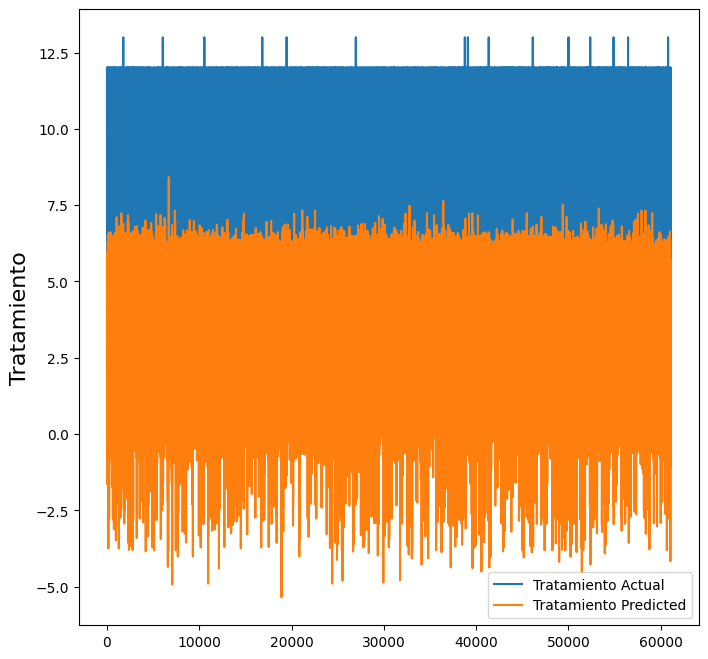

In [19]:
# Creamos una figura para la gráfica
plt.figure(figsize=(8,8))
plt.ylabel('Tratamiento', fontsize=16)

# Graficamos los valores reales y predichos
plt.plot(dfr)
plt.legend(['Tratamiento Actual', 'Tratamiento Predicted'])
plt.show()

<Axes: >

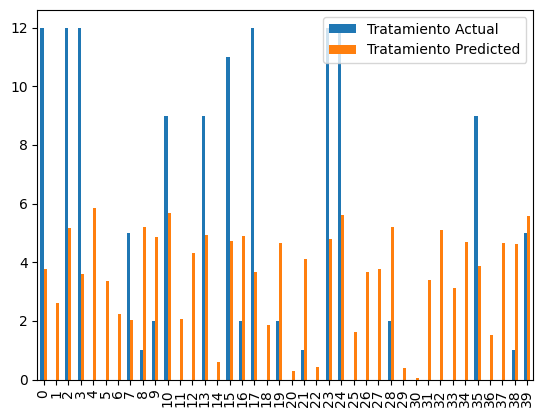

In [20]:
graph = dfr.head(40)
graph.plot(kind='bar')